<a href="https://colab.research.google.com/github/Eternalstar69/InsightFit/blob/main/InsightFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv")

# Step 1: Check for Missing Values
print("Missing Values:\n", df.isnull().sum())
df.dropna(inplace=True)
print("After Dropping Missing Values:\n", df.isnull().sum())

# Step 2: Check for Duplicates
print("Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("After Dropping Duplicates:", df.duplicated().sum())

# Step 3: Check Data Types
print("Data Types:\n", df.dtypes)

# Step 4: Cleaning Numeric Data
df["Age"] = df["Age"].astype(int)  # Convert Age to integer
df["Height"] = df["Height"].round(2)  # Round Height to 2 decimals
df["Weight"] = df["Weight"].round(2)  # Round Weight to 2 decimals

# Apply ceiling or floor to specific columns
df["NCP"] = np.ceil(df["NCP"])  # Ceil up
df["FCVC"] = np.floor(df["FCVC"])  # Floor down
df["CH2O"] = np.ceil(df["CH2O"])  # Ceil up
df["TUE"] = np.ceil(df["TUE"])  # Ceil up
df["FAF"] = np.ceil(df["FAF"])  # Ceil up

# Step 5: Handle Categorical Variables
print("Categorical Columns:\n", df.select_dtypes(include=["object"]).columns)

# Step 6: Check for Outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 7: Check Class Distribution (Target Variable)
print("Class Distribution:\n", df["NObeyesdad"].value_counts())

# Step 8: Save the Cleaned Dataset
df.to_csv("InsightFit.csv", index=False)
print("Cleaned dataset saved as InsightFit.csv")


Missing Values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
After Dropping Missing Values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SM

In [ ]:
# data analysis
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv('InsightFit.csv')

# เลือกคอลัมน์ที่เป็น Numerical Data
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC']

# สร้าง DataFrame เพื่อเก็บสถิติ
stats_df = pd.DataFrame(columns=['คอลัมน์', 'ค่าเฉลี่ย', 'มัธยฐาน', 'ส่วนเบี่ยงเบนมาตรฐาน', 'ค่าต่ำสุด', 'ค่าสูงสุด'])

# คำนวณสถิติสำหรับแต่ละคอลัมน์
all_stats = []  # Create an empty list to store data for each column
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()

    # Append data for the current column to the list
    all_stats.append({
        'column': col,
        'mean': mean,
        'median': median,
        'S.D.': std,
        'min': min_val,
        'max': max_val
    })

# Create the stats_df DataFrame using pd.DataFrame
stats_df = pd.DataFrame(all_stats)

# ปรับรูปแบบการแสดงผล
# Apply formatting to all columns except 'คอลัมน์'
for col in stats_df.columns[1:]:  # Start from the second column
    stats_df[col] = stats_df[col].map('{:.1f}'.format)

# แสดงผลลัพธ์ using to_string for better formatting
print(stats_df.to_string())

# 1. สถิติสำหรับ Gender
gender_stats = df['Gender'].value_counts(normalize=True) * 100
gender_counts = df['Gender'].value_counts()

print("Gender Statistics:")
for gender, percentage in gender_stats.items():
    count = gender_counts[gender]
    print(f"{gender} {percentage:.0f}% ({count} คน)")

# 2. สถิติสำหรับ NObeyesdad
nobeyesdad_stats = df['NObeyesdad'].value_counts(normalize=True) * 100
nobeyesdad_counts = df['NObeyesdad'].value_counts()

print("\nNObeyesdad Statistics:")
for category, percentage in nobeyesdad_stats.items():
    count = nobeyesdad_counts[category]
    print(f"{category}: {percentage:.0f}% ({count} คน)")

   column  mean median  S.D.   min    max
0     Age  24.0   22.0   6.3  14.0   61.0
1  Height   1.7    1.7   0.1   1.4    2.0
2  Weight  86.9   83.1  26.2  39.0  173.0
3    FCVC   2.2    2.0   0.6   1.0    3.0
Gender Statistics:
Male 50% (1052 คน)
Female 50% (1035 คน)

NObeyesdad Statistics:
Obesity_Type_I: 17% (351 คน)
Obesity_Type_III: 16% (324 คน)
Obesity_Type_II: 14% (297 คน)
Overweight_Level_II: 14% (290 คน)
Normal_Weight: 14% (282 คน)
Overweight_Level_I: 13% (276 คน)
Insufficient_Weight: 13% (267 คน)


In [ ]:
import pandas as pd

# Read the cleaned dataset
df_cleaned = pd.read_csv('InsightFit.csv')

# Display 5 random rows with better formatting
random_rows = df_cleaned.sample(5)
random_rows.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1140,Female,27,1.510000,63.890000,yes,no,2.000000,1.000000,Sometimes,no,2.000000,no,1.000000,0.000000,no,Public_Transportation,Overweight_Level_II
1590,Male,31,1.760000,118.550000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,2.000000,Sometimes,Automobile,Obesity_Type_II
1424,Male,22,1.740000,96.740000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,2.000000,no,Public_Transportation,Obesity_Type_I
652,Female,21,1.740000,50.480000,yes,yes,3.000000,4.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,Insufficient_Weight
220,Female,20,1.600000,50.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,1.000000,no,Automobile,Normal_Weight


In [ ]:
# Detect outliers using IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier mask using 1.5 * IQR
outlier_mask = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))




In [ ]:
# Import required libraries
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
df = pd.read_csv("InsightFit.csv")

# Show data overview
print(df.shape)
df.head()


(2087, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Create a new weight classification column
def weight_group(cat):
    if cat == 'Normal_Weight':
        return 'Normal'
    elif 'Overweight' in cat or 'Obesity' in cat:
        return 'Overweight_Obese'
    else:
        return 'Others'

df['WeightGroup'] = df['NObeyesdad'].apply(weight_group)

# Check distribution
df['WeightGroup'].value_counts()


,count
WeightGroup,
Overweight_Obese,1538
Normal,282
Others,267


In [ ]:
# Chi-Square Test for Categorical Variables
categorical_vars = [ 'family_history_with_overweight', 'FAVC', 'CAEC',
                     'SCC', 'MTRANS']

chi_results = []

for var in categorical_vars:
    table = pd.crosstab(df[var], df['WeightGroup'])
    chi2, p, dof, expected = chi2_contingency(table)
    chi_results.append({
        'Variable': var,
        'Chi2 Statistic': round(chi2, 3),
        'Degrees of Freedom': dof,
        'p-value': p
    })

# Create DataFrame of results
chi_df = pd.DataFrame(chi_results).sort_values(by='p-value')
chi_df


,Variable,Chi2 Statistic,Degrees of Freedom,p-value
2,CAEC,639.787,6,6.077487e-135
0,family_history_with_overweight,535.239,2,5.948473e-117
1,FAVC,109.284,2,1.859396e-24
4,MTRANS,127.807,8,8.054960e-24
3,SCC,42.091,2,7.244604e-10


In [ ]:
# Select only variables with significant association (p < 0.05)
significant_chi = chi_df[chi_df['p-value'] < 0.05]
significant_chi


,Variable,Chi2 Statistic,Degrees of Freedom,p-value
2,CAEC,639.787,6,6.077487e-135
0,family_history_with_overweight,535.239,2,5.948473e-117
1,FAVC,109.284,2,1.859396e-24
4,MTRANS,127.807,8,8.054960e-24
3,SCC,42.091,2,7.244604e-10


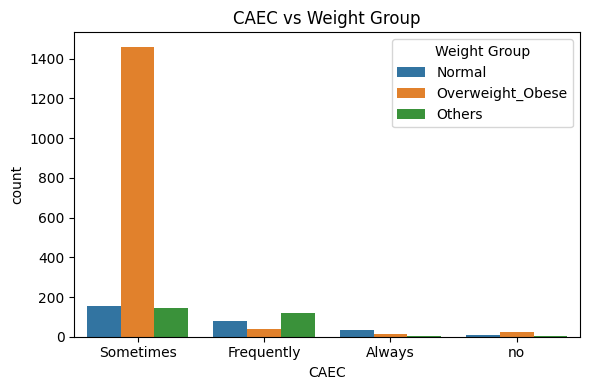

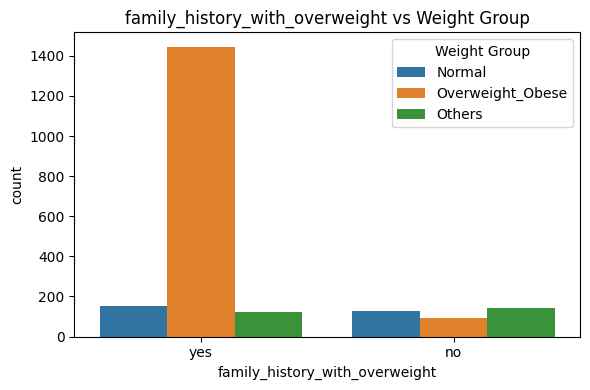

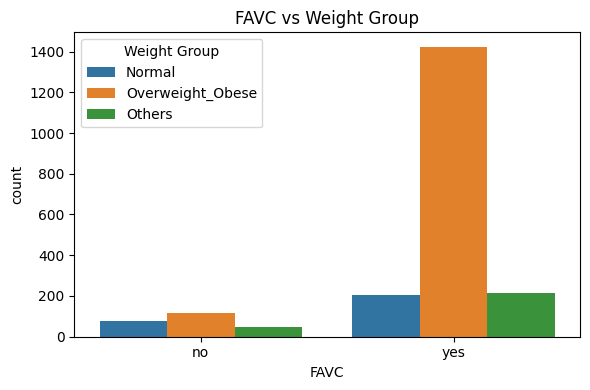

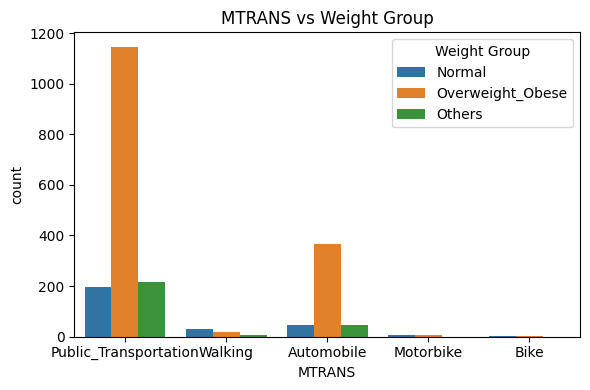

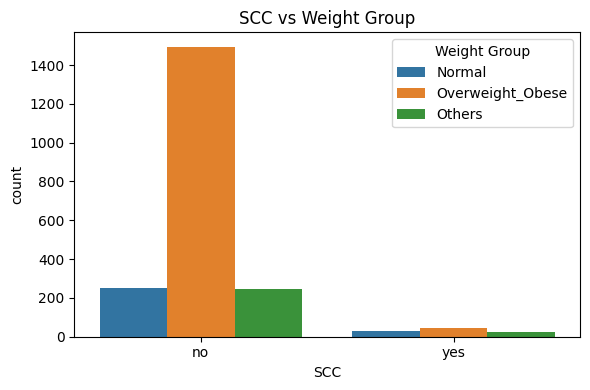

In [ ]:
# Plot countplots for significant categorical variables
for var in significant_chi['Variable']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue='WeightGroup', data=df)
    plt.title(f'{var} vs Weight Group')
    plt.legend(title='Weight Group')
    plt.tight_layout()
    plt.show()


In [ ]:
# Correlation analysis for numerical variables
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
corr_matrix = df[numerical_vars].corr()

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Pearson Correlation)')
plt.show()


In [ ]:
# Convert NObeyesdad to numeric values
weight_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['WeightCategoryNum'] = df['NObeyesdad'].map(weight_mapping)

# Correlation with WeightCategoryNum
corr_with_target = df[numerical_vars + ['WeightCategoryNum']].corr()['WeightCategoryNum'].drop('WeightCategoryNum')
corr_with_target.sort_values(ascending=False)


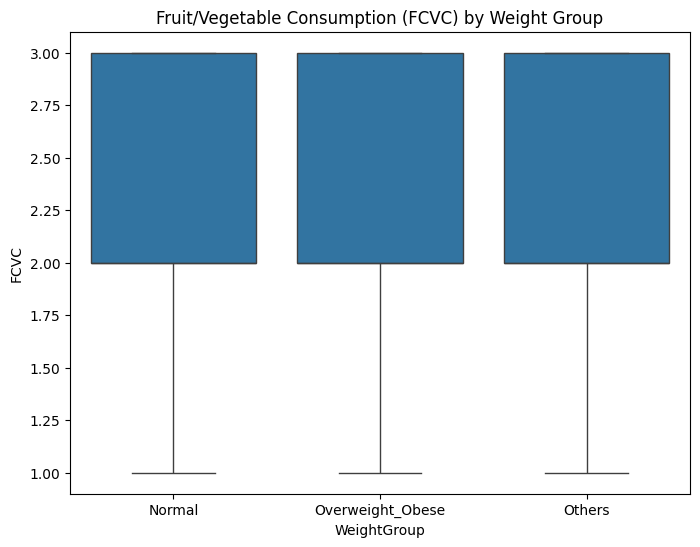

In [ ]:
# Compare FCVC across weight groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeightGroup', y='FCVC', data=df)
plt.title('Fruit/Vegetable Consumption (FCVC) by Weight Group')
plt.show()


In [ ]:
selected_qualitative = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS']
selected_quantitative = ['Age', 'Height', 'Weight', 'FCVC', 'FAF', 'CH2O', 'TUE', 'NCP']


Chi-Square Test Results:
                         Variable  Chi2 Statistic  Degrees of Freedom  p-value
0  family_history_with_overweight         535.239                   2      0.0
1                            FAVC         109.284                   2      0.0
2                            CAEC         639.787                   6      0.0
3                             SCC          42.091                   2      0.0
4                          MTRANS         127.807                   8      0.0

Significant Chi-Square Test Results (p < 0.05):
                         Variable  Chi2 Statistic  Degrees of Freedom  p-value
0  family_history_with_overweight         535.239                   2      0.0
1                            FAVC         109.284                   2      0.0
2                            CAEC         639.787                   6      0.0
3                             SCC          42.091                   2      0.0
4                          MTRANS         127.807        

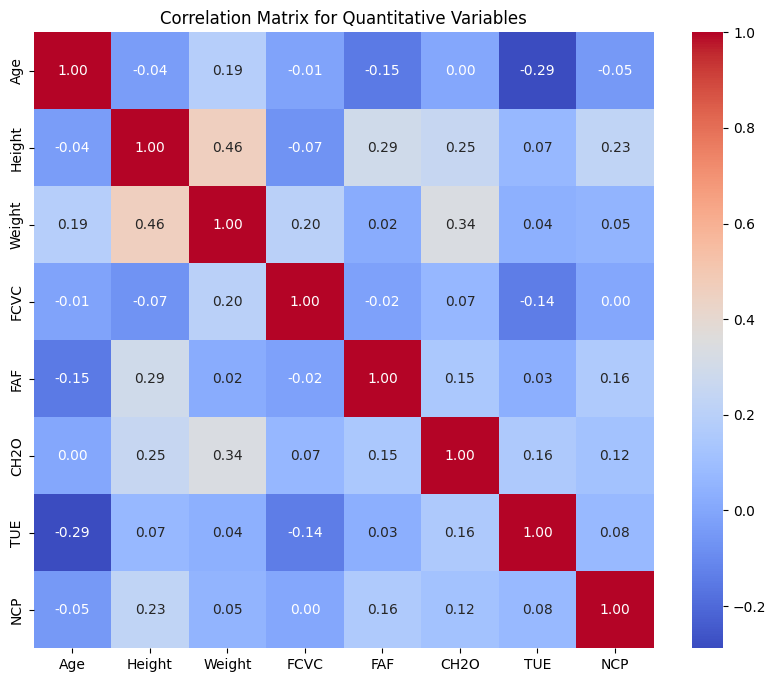